# **Loading Tabular Data** for Metapath2vec Embeddings, Discrimination Potential Example

Yuxiao Dong, Nitesh V. Chawla, and Ananthram Swami. 2017. Metapath2vec: Scalable Representation Learning for Heterogeneous Networks. In Proceedings of the 23rd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD '17). Association for Computing Machinery, New York, NY, USA, 135–144. https://doi.org/10.1145/3097983.3098036

Unbiased embeddings should not take into account the sensitive attributes of the users. Rather the embedding representations of users should rather be accquired by solely utilizing the interactions users have with their content. This is infact what makes users different from eachother. These unbisaed embeddings allow us to define clusters of similar users, where similar suggests that users who interact similarly should be closer together in the respective embedding space.

NOTE: These embeddings are generated in an unbiased manner. This does not mean they do not have discrimination potential, if interested in the combination of fair embeddings for homogenous graphs read up on FairWalk https://www.ijcai.org/Proceedings/2019/456. (A "fairwalk" like approach for heterogenous graph embeddings generated from metapath2vec has not been implemented ;)... I seriously recommend looking into developing this, as it could push the field of fair representation learning forward)

In this paricular notebook...

I will use the following dataset to generate embeddings, and deploy two classification techniques to predict the sensitive attribute

**Dataset: ML100k Standard Tabular Dataset**

**Attribute: Gender and Occupation**

# Imports

Notice that this notebook requires the imports from pytorch_geometric. This library must be installed specific to the running device. Find and install the configuration 

https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html

In [1]:
#!pip or conda install ............

In [2]:
import torch
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Import Tabular ML100k Dataset

I went ahead and configured a function to load the ML100k dataset when provided the root directory of the files

In [4]:
from dataset import load_ML100K
ratings,users,movies = load_ML100K('../data/ml-100k/raw/ml-100k/')

# Creating a edge_index dictionary for users and moveis

In [33]:
edge_index_dict={
    ('user','rates','movie'):torch.tensor([ratings['user_id'].tolist(),ratings['movie_id'].tolist()]),
    ('movie','rev_rates','user'):torch.tensor([ratings['movie_id'].tolist(),ratings['user_id'].tolist()])
}
edge_index_dict

{('user',
  'rates',
  'movie'): tensor([[ 195,  185,   21,  ...,  275,   12,   11],
         [ 241,  301,  376,  ..., 1089,  224,  202]]),
 ('movie',
  'rev_rates',
  'user'): tensor([[ 241,  301,  376,  ..., 1089,  224,  202],
         [ 195,  185,   21,  ...,  275,   12,   11]])}

In [65]:
from utils import get_metapath2vec_embbeddings
metapath= [
    ('user', 'rates', 'movie'),
    ('movie', 'rev_rates', 'user'),
]

embedding_dict = get_metapath2vec_embbeddings(edge_index_dict, metapath, device)

 Training metapath2vec embedding representations Epoch: 25 of 25, Step: 8.000/8, Loss: 1.329 

torch.Size([943, 64])

M == 1
F == 0


/Users/deancochran/Dev/ml/.env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


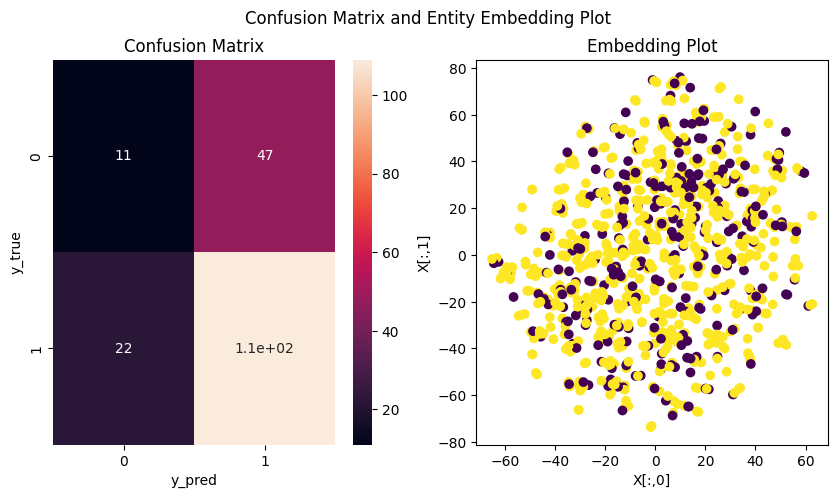

              precision    recall  f1-score   support

           0       0.33      0.19      0.24        58
           1       0.70      0.83      0.76       131

    accuracy                           0.63       189
   macro avg       0.52      0.51      0.50       189
weighted avg       0.59      0.63      0.60       189



In [73]:
from sklearn.preprocessing import LabelEncoder
from utils import rf_discriminator_test, get_tsne_emb
le = LabelEncoder()
le.fit(users['gender'].unique())

lists_of_unique_vals=[]
for val in users['gender'].unique():
    lists_of_unique_vals.append([val])
for list in lists_of_unique_vals:
    print(list[0], '==', le.transform(list)[0])
    
X = get_tsne_emb(embedding_dict['user'], perplexity=3)
y_true = torch.tensor(le.transform(users['gender']))

rf_discriminator_test(X,y_true)

technician == 19
other == 13
writer == 20
executive == 6
administrator == 0
student == 18
lawyer == 9
educator == 3
scientist == 17
entertainment == 5
programmer == 14
librarian == 10
homemaker == 8
artist == 1
engineer == 4
marketing == 11
none == 12
healthcare == 7
retired == 15
salesman == 16
doctor == 2


/Users/deancochran/Dev/ml/.env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


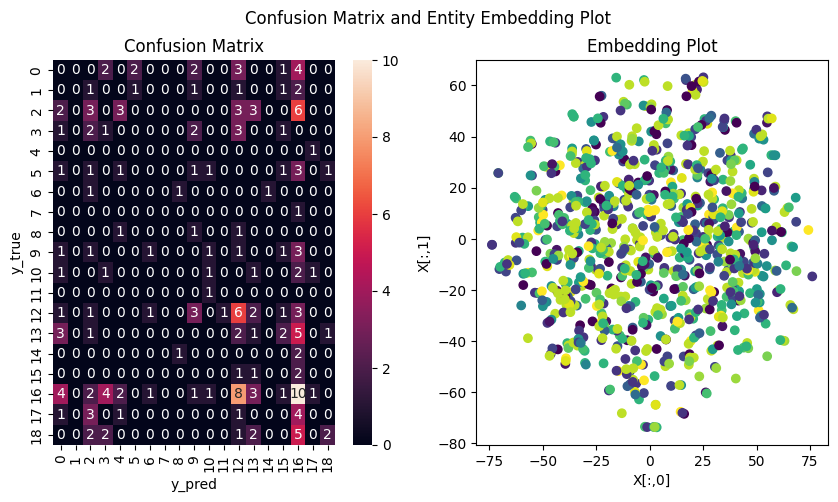

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         7
           3       0.17      0.15      0.16        20
           4       0.10      0.10      0.10        10
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         9
          11       0.20      0.14      0.17         7
          12       0.00      0.00      0.00         1
          13       0.19      0.32      0.24        19
          14       0.08      0.07      0.07        15
          15       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         4
          18       0.19      0.26      0.22        38
          19       0.00    

/Users/deancochran/Dev/ml/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deancochran/Dev/ml/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deancochran/Dev/ml/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.preprocessing import LabelEncoder
from utils import rf_discriminator_test, get_tsne_emb
le = LabelEncoder()
le.fit(users['occupation'].unique())

lists_of_unique_vals=[]
for val in users['occupation'].unique():
    lists_of_unique_vals.append([val])
for list in lists_of_unique_vals:
    print(list[0], '==', le.transform(list)[0])
    
X = get_tsne_emb(embedding_dict['user'], perplexity=3)
y_true = torch.tensor(le.transform(users['occupation']))

rf_discriminator_test(X,y_true)